#Treasury Index Stock Visualizaiton


This set of codes provide a comprehensive toolkit for financial analysis and investment decision-making. They enable users to fetch historical stock data, analyze return rates, visualize investment growth, and compare stock performance against market indices and treasury bonds. Additionally, users can randomly select stocks for analysis or highlight specific stocks for focused examination. Overall, these codes offer valuable insights into stock market trends, help identify investment opportunities, and support informed decision-making for investors, analysts, and researchers.

# Background

1. Installs the yfinance library if it's not already installed.
2. Imports necessary modules such as dateutil.relativedelta, datetime, requests, numpy, pandas, and yfinance.
3. Generates a list of colors, shuffles them randomly, and prints the shuffled list that we will use for visualization.

In [1]:
#!pip install yfinance

In [2]:
from dateutil.relativedelta import relativedelta
import datetime
import requests
import numpy as np
import pandas as pd
import yfinance as yf
import warnings
warnings.filterwarnings('ignore')

In [3]:
import random

colors = [
    'blue', 'red', 'green', 'black', 'olive', 'navy', 'purple', 'orange',
    'brown', 'gray', 'lavender', 'teal', 'aquamarine', 'lime', 'magenta', 'coral',
    'cyan', 'yellow', 'turquoise', 'wheat', 'tan', 'khaki', 'silver',
    'indigo', 'crimson', 'maroon', 'pink', 'beige'
]
# Remove Maroon to save it for market
colors.remove('maroon')

# Define the colors
darker_colors = [
    'blue', 'red', 'green', 'black', 'navy', 'purple', 'brown', 'gray', 'teal',
    'magenta', 'coral', 'cyan', 'indigo', 'crimson', 'maroon'
]

darker_colors.remove('maroon')

lighter_colors = [
    'olive', 'orange', 'lavender', 'aquamarine', 'lime', 'yellow', 'turquoise',
    'wheat', 'tan', 'khaki', 'silver', 'pink', 'beige'
]
#random.shuffle(colors)
print(colors)

['blue', 'red', 'green', 'black', 'olive', 'navy', 'purple', 'orange', 'brown', 'gray', 'lavender', 'teal', 'aquamarine', 'lime', 'magenta', 'coral', 'cyan', 'yellow', 'turquoise', 'wheat', 'tan', 'khaki', 'silver', 'indigo', 'crimson', 'pink', 'beige']


# Data Input

In [13]:
#History Data Time Frame
Startdate = "2022-08-01"
Enddate = "2024-09-04"

Startdate = pd.to_datetime(Startdate)
Enddate = pd.to_datetime(Enddate)

# Risk-free Rate

Sets the start and end dates for the historical data and fetches data for Treasury bonds from Yahoo Finance. It filters and cleans the data by extracting only the 'Adj Close' columns, renaming them, converting dates to datetime format, and converting values to percentages.

In [14]:
import yfinance as yf

# Define the ticker symbols for Treasury bonds
tickers = ["^IRX", "^FVX", "^TNX", "^TYX"]  # 6-month T-bill, 5-year, 10-year, 30-year

# Fetch data
Risk_Free_Rate = yf.download(tickers, start=Startdate, end=Enddate, interval="1wk")

# Filter only 'Adj Close' columns
adj_close_columns = [col for col in Risk_Free_Rate.columns if 'Adj Close' in col]
Risk_Free_Rate_adj_close = Risk_Free_Rate[adj_close_columns]

# Clean column names
Risk_Free_Rate_adj_close.columns = [col[1] for col in Risk_Free_Rate_adj_close.columns]
Risk_Free_Rate = Risk_Free_Rate_adj_close.reset_index()
print('Column names cleaned and DataFrame reset.')

[*********************100%***********************]  4 of 4 completed

Column names cleaned and DataFrame reset.


In [15]:
Risk_Free_Rate = Risk_Free_Rate.rename(columns = {"^IRX": "TB13W", "^FVX": "TB5", "^TNX": "TB10", "^TYX": "TB30"})
Risk_Free_Rate["Date"] = pd.to_datetime(Risk_Free_Rate["Date"])
Risk_Free_Rate.iloc[:, 1:] = Risk_Free_Rate.iloc[:, 1:]/100
Risk_Free_Rate = Risk_Free_Rate[['Date', 'TB13W','TB5', 'TB10', 'TB30']]

In [16]:
Risk_Free_Rate.tail()

,Date,TB13W,TB5,TB10,TB30
105,2024-08-05 00:00:00+00:00,0.05075,0.03796,0.03942,0.04225
106,2024-08-12 00:00:00+00:00,0.05075,0.03768,0.03892,0.04149
107,2024-08-19 00:00:00+00:00,0.05000,0.03650,0.03807,0.04102
108,2024-08-26 00:00:00+00:00,0.04968,0.03715,0.03911,0.04196
109,2024-09-02 00:00:00+00:00,0.04970,0.03656,0.03844,0.04131


This part plots the mean of the latest data/the chose date for each Treasury bond.

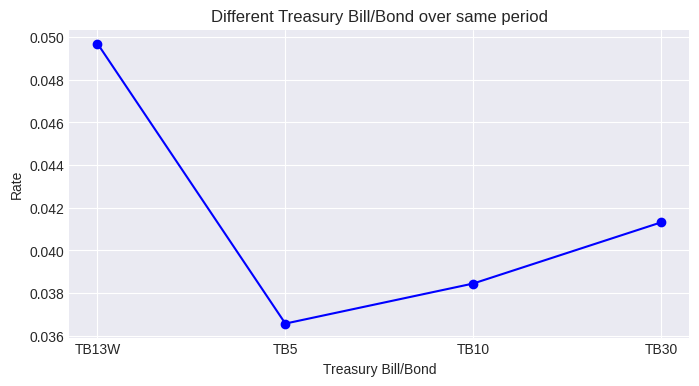

In [17]:
import matplotlib.pyplot as plt
plt.style.use("seaborn-darkgrid")

Moving = 1

# Chart of cost of equity for each year for Amazon stock graphically represented from 2002 to 2022
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(8, 4)

# Single row data
Treasury = Risk_Free_Rate.tail(Moving).mean()
#Treasury = Risk_Free_Rate[Risk_Free_Rate['Date'] == "2022-11-07"].tail(Moving).mean()

# Plotting a line connecting the dots
axes.plot(Treasury.index[1:], Treasury.values[1:], color='blue', linestyle='-', marker='o')

axes.set_xlabel('Treasury Bill/Bond')
axes.set_ylabel('Rate')
axes.set_title('Different Treasury Bill/Bond over same period')
axes.legend()
plt.show()

Generates a plot showing the historical data for each Treasury bond over time.

In [18]:
#!pip install plotly

In [19]:
import plotly.graph_objects as go
import plotly.io as pio

pio.templates.default = "plotly_dark"

# Create traces for each bond
traces = []
for bond in Risk_Free_Rate.iloc[:, 1:].columns:
    trace = go.Scatter(
        x=Risk_Free_Rate["Date"],
        y=Risk_Free_Rate[bond],
        mode='lines',
        name=bond
    )
    traces.append(trace)

# Layout settings
layout = go.Layout(
    title='Risk-Free Rate',
    xaxis=dict(title='Date'),
    yaxis=dict(title='Rate'),
    legend=dict(x=1.02, y=1)
)
# Create a figure
fig = go.Figure(data=traces, layout=layout)

# Show the plot
fig.show()

In [20]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

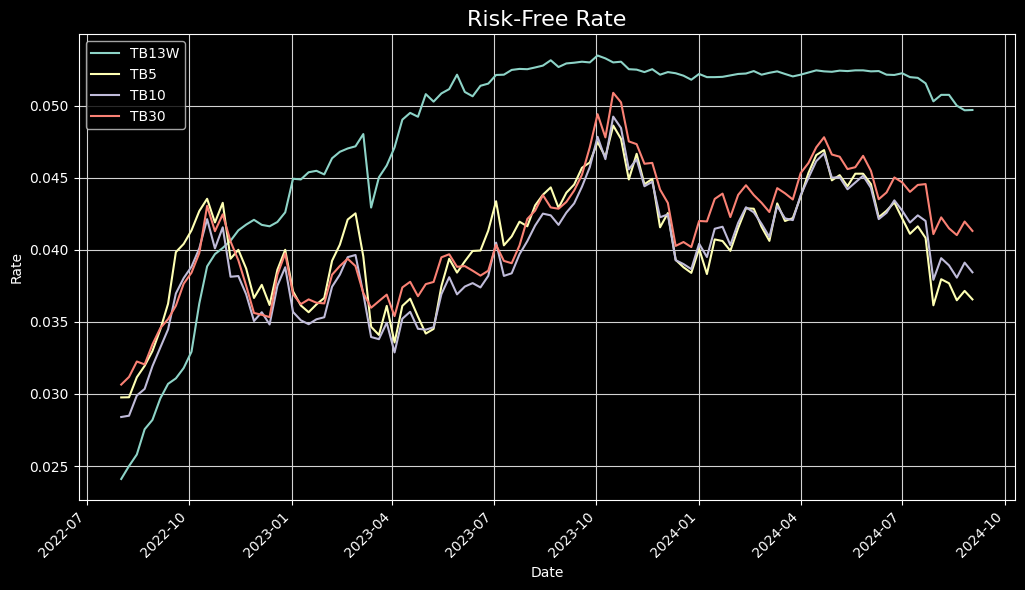

In [21]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use("dark_background")

# Chart of cost of equity for each year for Amazon stock graphically represented from 2002 to 2022
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(12, 6)

for bond in Risk_Free_Rate.iloc[:, 1:].columns:
    axes.plot(Risk_Free_Rate["Date"], Risk_Free_Rate[bond], label=bond)

axes.set(title="Risk-Free Rate", xlabel="Date", ylabel="Rate")
axes.title.set_size(16)
plt.grid(color="lightgray")
fig.autofmt_xdate(rotation=45)  # format x-axis as date, rotate 45 degrees
# axes.set_facecolor('black') #make background behind grid whiteaxes[0].legend([Trade_Name +" Cost of Equity"] ,loc = 2) #move legend to right
fig.tight_layout()  # use tight layout
axes.legend(loc=2)  # move legend to upper left
fig.subplots_adjust(right=0.85)  # adjust subplots to make legend fit, adjusted this a bit from smaller figure example!
axes.grid(color="lightgray")
plt.show()

# Index


This part of the code fetches historical data for three major indices: NASDAQ, Dow Jones, and S&P 500, using the yfinance library. It defines the ticker symbols for these indices, fetches the data for the specified time frame at monthly intervals, and processes the data to calculate percentage changes and rolling averages.

##Visualization

Fetches historical data for NASDAQ, Dow Jones, and S&P 500 indices using the yfinance library.
It filters the fetched data to extract only the 'Adj Close' columns and cleans the column names.
The data is stored in a DataFrame named Index.

In [ ]:
import yfinance as yf
# Define the ticker symbols for Treasury bonds
tickers = ["^IXIC", "^DJI", "^GSPC"]  # NASDAQ, Dow Jones, S%P 500

# Fetch data
Index = yf.download(tickers, start=Startdate - pd.DateOffset(months=1), end=Enddate, interval="1wk")

# Filter only 'Adj Close' columns
adj_close_columns = [col for col in Index.columns if 'Adj Close' in col]
Index_adj_close = Index[adj_close_columns]

# Clean column names
Index_adj_close.columns = [col[1] for col in Index_adj_close.columns]
Index = Index_adj_close.reset_index()
print('Column names cleaned and DataFrame reset.')

[*********************100%%**********************]  3 of 3 completed


Column names cleaned and DataFrame reset.


Renames the columns to more readable names, converts the date column to datetime format, and calculates the percentage change for each index.
Then drops any rows with missing values.

In [ ]:
Index = Index.rename(columns = {"^IXIC": "NASDAQ", "^DJI":"Dow Jones", "^GSPC":"S&P 500"})
Index["Date"] = pd.to_datetime(Index["Date"])
Index.iloc[:, 1:] = Index.iloc[:, 1:].apply(lambda x: pd.to_numeric(x, errors='coerce').pct_change().replace(np.nan, 0).replace(np.inf, ""), axis=0)
Index = Index.dropna()

This part plots the percentage change for each index with a rolling average with the period of time we choose(monthly).

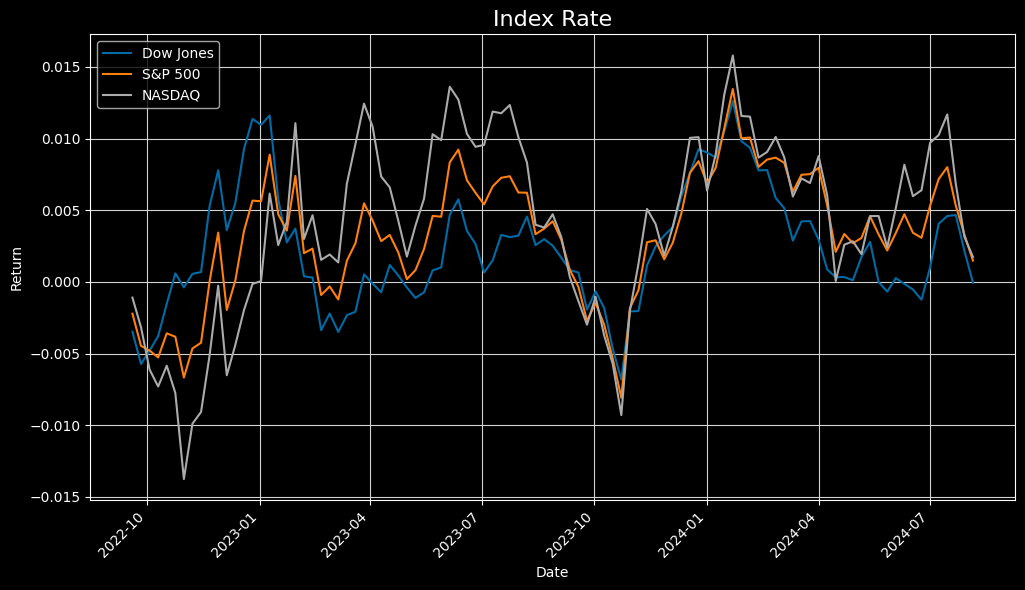

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("tableau-colorblind10")

# Chart of cost of equity for each year for Amazon stock graphically represented from 2002 to 2022
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(12, 6)

Moving = 13

for index in Index.iloc[:, 1:].columns:
    axes.plot(Index["Date"], Index[index].rolling(Moving).mean(), label=index)

axes.set(title="Index Rate", xlabel="Date", ylabel="Return")
axes.title.set_size(16)
plt.grid(color="lightgray")
fig.autofmt_xdate(rotation=45)  # format x-axis as date, rotate 45 degrees
# axes.set_facecolor('black') #make background behind grid whiteaxes[0].legend([Trade_Name +" Cost of Equity"] ,loc = 2) #move legend to right
fig.tight_layout()  # use tight layout
axes.legend(loc=2)  # move legend to upper left
fig.subplots_adjust(right=0.85)  # adjust subplots to make legend fit, adjusted this a bit from smaller figure example!
axes.grid(color="lightgray")
plt.show()

Creates a new DataFrame Index_Investment to show the growth of investment based on the cumulative percentage change.
Then plots the investment growth for each index over time.

In [ ]:
Index_Investment = Index.copy()
Index_Investment.iloc[:, 1:] = Index_Investment.iloc[:, 1:].apply(lambda x: (1+x).cumprod()*1000)

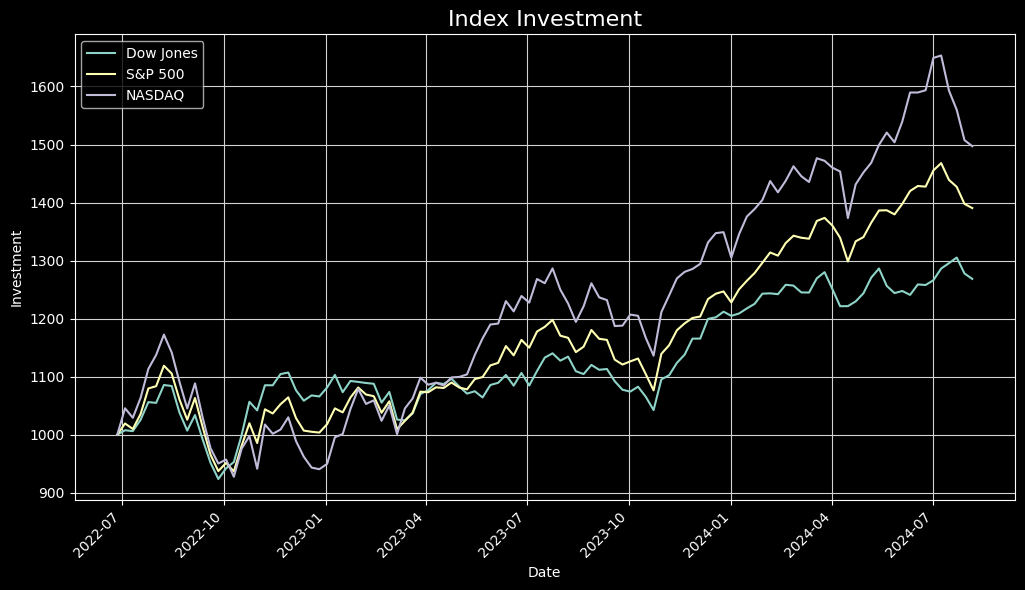

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

# Chart of cost of equity for each year for Amazon stock graphically represented from 2002 to 2022
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(12, 6)

for index in Index_Investment.iloc[:, 1:].columns:
    axes.plot(Index_Investment["Date"], Index_Investment[index], label=index)

axes.set(title="Index Investment", xlabel="Date", ylabel="Investment")
axes.title.set_size(16)
plt.grid(color="lightgray")
fig.autofmt_xdate(rotation=45)  # format x-axis as date, rotate 45 degrees
# axes.set_facecolor('black') #make background behind grid whiteaxes[0].legend([Trade_Name +" Cost of Equity"] ,loc = 2) #move legend to right
fig.tight_layout()  # use tight layout
axes.legend(loc=2)  # move legend to upper left
fig.subplots_adjust(right=0.85)  # adjust subplots to make legend fit, adjusted this a bit from smaller figure example!
axes.grid(color="lightgray")
plt.show()

## Retrieves the lists of stocks from each index

This code retrieves the list of S&P 500/S&P 100/Dow Jones/NASDAQ companies from Wikipedia and stores it in a DataFrame.



Sets the URL of the Wikipedia page containing the list. Uses the pd.read_html() function to scrape tables from the Wikipedia page. The match parameter is set to 'Symbol' to match the column name 'Symbol', which is present in the table we want. [0] is used to select the first table found on the page, assuming it contains the components. The data is then stored in the DataFrame. Displays the first few rows of the DataFrame to verify that the data has been successfully retrieved.










In [ ]:
import pandas as pd
url = 'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
sp_500_components = pd.read_html(url, match='Symbol')[0]
sp_500_components.head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [ ]:
# Fetching the Dow Jones Industrial Average components from Wikipedia
url = 'https://en.wikipedia.org/wiki/S%26P_100'
sp_100_components = pd.read_html(url, match='Symbol')[0]
sp_100_components.head()

,Symbol,Name,Sector
0,AAPL,Apple Inc.,Information Technology
1,ABBV,AbbVie,Health Care
2,ABT,Abbott Laboratories,Health Care
3,ACN,Accenture,Information Technology
4,ADBE,Adobe Inc.,Information Technology


In [ ]:
url = 'https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average'
dow_jones_components = pd.read_html(url, match='Symbol')[0]
dow_jones_components.head()

,Company,Exchange,Symbol,Industry,Date added,Notes,Index weighting
0,3M,NYSE,MMM,Conglomerate,1976-08-09,As Minnesota Mining and Manufacturing,1.54%
1,American Express,NYSE,AXP,Financial services,1982-08-30,NaN,3.64%
2,Amgen,NASDAQ,AMGN,Biopharmaceutical,2020-08-31,NaN,4.80%
3,Amazon,NASDAQ,AMZN,Retailing,2024-02-26,NaN,2.93%
4,Apple,NASDAQ,AAPL,Information technology,2015-03-19,NaN,3.04%


In [ ]:
# Fetching the NASDAQ-100 components from Wikipedia
url = 'https://en.wikipedia.org/wiki/NASDAQ-100'
nasdaq_100_components = pd.read_html(url, match='Ticker')[0]
nasdaq_100_components.head()

,Company,Ticker,GICS Sector,GICS Sub-Industry
0,Adobe Inc.,ADBE,Information Technology,Application Software
1,Airbnb,ABNB,Consumer Discretionary,"Hotels, Resorts & Cruise Lines"
2,Alphabet Inc. (Class A),GOOGL,Communication Services,Interactive Media & Services
3,Alphabet Inc. (Class C),GOOG,Communication Services,Interactive Media & Services
4,Amazon,AMZN,Consumer Discretionary,Broadline Retail


Randomly selects a set symbols from the index components DataFrame and prints them.

In [ ]:
random_selection = random.sample(sp_100_components['Symbol'].tolist(), 8)
print(random_selection)

['MDT', 'TMUS', 'WMT', 'UNH', 'JPM', 'PFE', 'MO', 'JNJ']


# Stock/ETF

## Stock Return without Highlight

This code fetches historical data for a list of stocks and plots their return rates and investment growth over time.

1. Imports the yfinance library, which is used to fetch stock data from Yahoo Finance. Defines a list of ticker symbols for the selected stocks.
2. Fetches historical stock data for the specified tickers from Yahoo Finance for the specified time frame at monthly intervals.
3. Filters the columns containing 'Close' in their names, assuming they represent the adjusted close prices of the stocks.
4. Cleans the column names and resets the index of the DataFrame. It also fills any missing values with an empty string.



In [ ]:
import yfinance as yf
# Define the ticker symbols
tickers = ['CVS', 'GD', 'ACN', 'AMGN', 'AMZN', 'ADBE', 'GILD', 'COST']

# Fetch date
Stock = yf.download(tickers, start=Startdate - pd.DateOffset(months=1), end=Enddate, interval="1wk")

# Filter only 'Adj Close' columns
adj_close_columns = [col for col in Stock.columns if 'Adj Close' in col]
Stock_adj_close = Stock[adj_close_columns]

# Filter only 'Adj Close' columns
adj_close_columns = [col for col in Stock.columns if 'Close' in col]
Stock_adj_close = Stock[adj_close_columns]

# Clean column names
Stock_adj_close.columns = [col[1] for col in Stock_adj_close.columns]
Stock = Stock_adj_close.reset_index()
Stock = Stock.fillna("")
print('\nColumn names cleaned and DataFrame reset.')

[*********************100%%**********************]  8 of 8 completed


Column names cleaned and DataFrame reset.


Converts the 'Date' column to datetime format and calculates the percentage change for each stock's adjusted close prices. It drops the first row (which contains NaN values after the percentage change calculation).

In [ ]:
Stock["Date"] = pd.to_datetime(Stock["Date"])
Stock.iloc[:, 1:] = Stock.iloc[:, 1:].apply(lambda x: pd.to_numeric(x, errors='coerce').pct_change().replace(np.nan, 0).replace(np.inf, ""), axis=0)
Stock = Stock[1:]

Plots the return rate of each stock with a rolling average with the period of time we assign(monthly). It also includes the S&P 500 index for comparison.

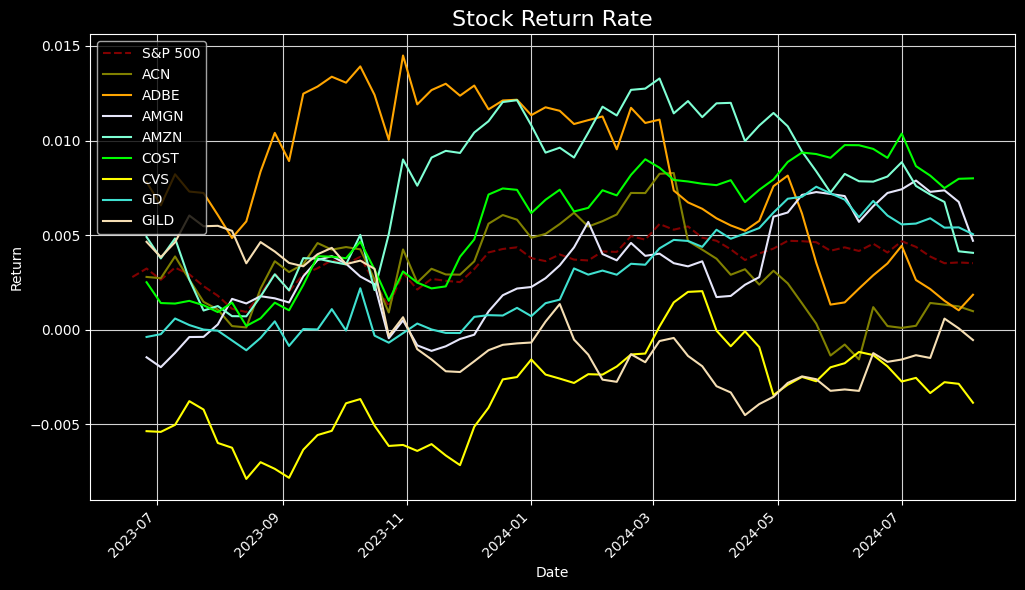

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

# Chart of cost of equity for each year for Amazon stock graphically represented from 2002 to 2022
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(12, 6)

Moving = 52

#Change to other Index if Needed
axes.plot(Index["Date"], Index["S&P 500"].rolling(Moving).mean(), label="S&P 500", color = "maroon", linestyle="--")

for i, stock in enumerate(Stock.iloc[:, 1:].columns):
    color = lighter_colors[i % len(darker_colors)]  # Use modulo to avoid IndexError
    axes.plot(Stock["Date"], Stock[stock].rolling(Moving).mean(), label=stock if len(tickers) > 1 else tickers[0], color=color)

axes.set(title="Stock Return Rate", xlabel="Date", ylabel="Return")
axes.title.set_size(16)
plt.grid(color="lightgray")
fig.autofmt_xdate(rotation=45)  # format x-axis as date, rotate 45 degrees
# axes.set_facecolor('black') #make background behind grid whiteaxes[0].legend([Trade_Name +" Cost of Equity"] ,loc = 2) #move legend to right
fig.tight_layout()  # use tight layout
axes.legend(loc=2)  # move legend to upper left
fig.subplots_adjust(right=0.85)  # adjust subplots to make legend fit, adjusted this a bit from smaller figure example!
axes.grid(color="lightgray")
plt.show()

In [ ]:
import plotly.graph_objects as go

# Assume Index and Stock DataFrames are already defined

Moving = 52

rolling_Index = Index["S&P 500"].rolling(Moving).mean().dropna()

# Create traces for S&P 500 and stock data
fig = go.Figure()

# Add S&P 500 trace with rolling mean
fig.add_trace(go.Scatter(
    x=Index["Date"][rolling_Index.index],
    y=rolling_Index,
    mode='lines',
    name='S&P 500',
    line=dict(color='maroon', dash='dash')
))

# Add traces for stock data
for i, stock in enumerate(Stock.iloc[:, 1:].columns):
    rolling_Stock = Stock[stock].rolling(Moving).mean().dropna()
    fig.add_trace(go.Scatter(
        x=Stock["Date"][rolling_Stock.index],
        y=rolling_Stock,
        mode='lines',
        name=stock if len(tickers) > 1 else tickers[0],
        line=dict(color=lighter_colors[i % len(darker_colors)])
    ))

# Update layout
fig.update_layout(
    title='Stock Return Rate',
    xaxis_title='Date',
    yaxis_title='Return',
    title_font_size=16,
    legend=dict(x=0, y=1, traceorder='normal'),
    xaxis=dict(
        tickformat='%Y-%m-%d',
        tickangle=45
    ),
    paper_bgcolor='black',
    plot_bgcolor='black',
    font_color='white'
)

fig.show()


Plots the investment growth for each stock over time, with the initial investment being $1000. It also includes the S&P 500 index for comparison.

In [ ]:
Stock_Investment = Stock.copy()
Stock_Investment.iloc[:, 1:] = Stock_Investment.iloc[:, 1:].apply(lambda x: (1+x).cumprod()*1000)

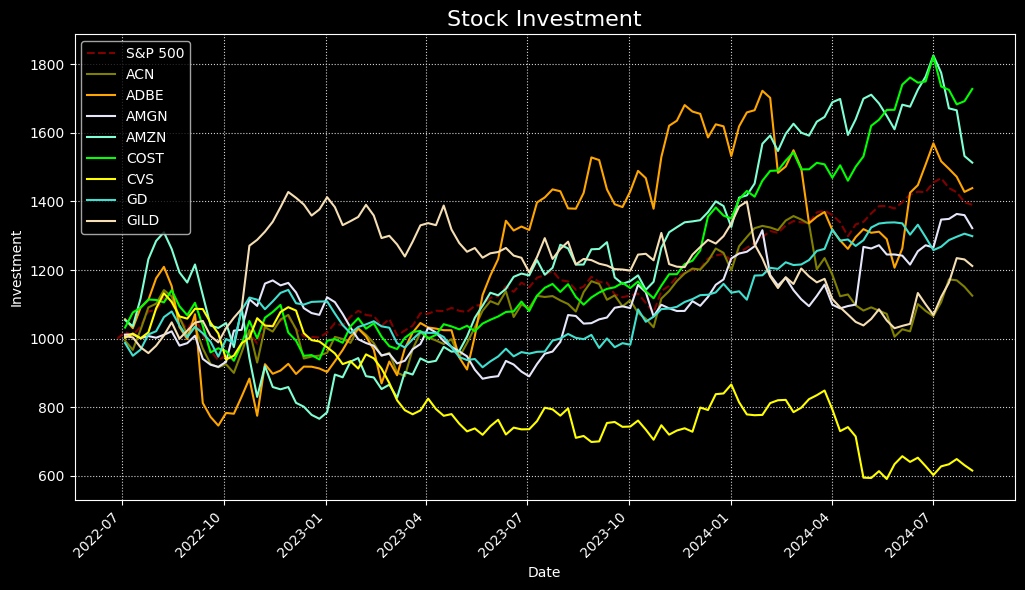

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(12, 6)

#Change to other Index if Needed
axes.plot(Index_Investment["Date"], Index_Investment["S&P 500"], label="S&P 500", color = "maroon", linestyle="--")

for i, stock in enumerate(Stock_Investment.iloc[:, 1:].columns):
    color = lighter_colors[i % len(darker_colors)]  # Use modulo to avoid IndexError
    axes.plot(Stock_Investment["Date"], Stock_Investment[stock], label=stock if len(tickers) > 1 else tickers[0], color=color)

axes.set(title="Stock Investment", xlabel="Date", ylabel="Investment")
axes.title.set_size(16)
plt.grid(color="lightgray")
fig.autofmt_xdate(rotation=45)  # format x-axis as date, rotate 45 degrees
# axes.set_facecolor('black') #make background behind grid whiteaxes[0].legend([Trade_Name +" Cost of Equity"] ,loc = 2) #move legend to right
fig.tight_layout()  # use tight layout
axes.legend(loc=2)  # move legend to upper left
fig.subplots_adjust(right=0.85)  # adjust subplots to make legend fit, adjusted this a bit from smaller figure example!
axes.grid(color="lightgray", linestyle=':')
plt.show()

In [ ]:
import plotly.graph_objects as go

# Assume Index_Investment and Stock_Investment DataFrames are already defined

# Create traces for S&P 500 and stock data
fig = go.Figure()

# Add S&P 500 trace
fig.add_trace(go.Scatter(
    x=Index_Investment["Date"],
    y=Index_Investment["S&P 500"],
    mode='lines',
    name='S&P 500',
    line=dict(color='maroon', dash='dash')
))

# Add traces for stock data
for i, stock in enumerate(Stock_Investment.iloc[:, 1:].columns):
    fig.add_trace(go.Scatter(
        x=Stock_Investment["Date"],
        y=Stock_Investment[stock],
        mode='lines',
        name=stock if len(tickers) > 1 else tickers[0],
        line=dict(color=lighter_colors[i % len(darker_colors)])
    ))

# Update layout to move the legend outside the chart
fig.update_layout(
    title='Stock Investment',
    xaxis_title='Date',
    yaxis_title='Investment',
    title_font_size=16,
    legend=dict(
        x=1,  # Move legend to the right of the plot
        y=1,  # Position it at the top
        traceorder='normal',
        orientation='v',  # Vertical orientation
        xanchor='left',  # Anchor legend to the left side
        yanchor='top'
    ),
    xaxis=dict(
        tickformat='%Y-%m-%d',
        tickangle=45
    ),
    paper_bgcolor='black',
    plot_bgcolor='black',
    font_color='white'
)

fig.show()



## Stock/Return With Highlight

This code fetches historical data for a list of highlighted and non-highlighted stocks, and then plots their return rates and investment growth over time.



This defines two lists of ticker symbols: tickers_highlight for the highlighted stock(s) and tickers_no_highlight for the non-highlighted stocks.

In [ ]:
# Define the ticker symbols
tickers_highlight = ['SHEL']

tickers_no_highlight = ['XOM', 'TTE', 'BP', 'MPC', 'VLO', 'E', 'COP']

1. Fetches historical stock data for the specified tickers from Yahoo Finance for the specified time frame at monthly intervals, for both highlighted and non-highlighted stocks.
2. Filter only the 'Adj Close' columns from the fetched data and clean the column names. The resulting DataFrames are Stock_highlight and Stock_no_highlight.

In [ ]:
import yfinance as yf

# Fetch date
Stock_all = yf.download(tickers_no_highlight + tickers_highlight, start=Startdate - pd.DateOffset(months=1), end=Enddate, interval="1wk")

# Filter only 'Adj Close' columns
adj_close_columns = [col for col in Stock_all.columns if 'Adj Close' in col]
Stock_all_adj_close = Stock_all[adj_close_columns]

# Filter only 'Adj Close' columns
adj_close_columns = [col for col in Stock_all.columns if 'Close' in col]
Stock_all_adj_close = Stock_all[adj_close_columns]

# Clean column names
Stock_all_adj_close.columns = [col[1] for col in Stock_all_adj_close.columns]
Stock_all = Stock_all_adj_close.reset_index()
Stock_all = Stock_all.fillna("")
print('\nColumn names cleaned and DataFrame reset.')

[*********************100%%**********************]  8 of 8 completed


Column names cleaned and DataFrame reset.


Convert the 'Date' column to datetime format and calculate the percentage change for each stock's adjusted close prices. They also drop the first row containing NaN values after the percentage change calculation.

In [ ]:
Stock_all["Date"] = pd.to_datetime(Stock_all["Date"])
Stock_all.iloc[:, 1:] = Stock_all.iloc[:, 1:].apply(lambda x: pd.to_numeric(x, errors='coerce').pct_change().replace(np.nan, 0).replace(np.inf, ""), axis=0)
Stock_all = Stock_all[1:]

Plots the return rate of each stock with a rolling average over a period of time we assign. It includes the S&P 500 index and highlights the stocks listed in tickers_highlight, while other stocks are plotted with a dotted line.

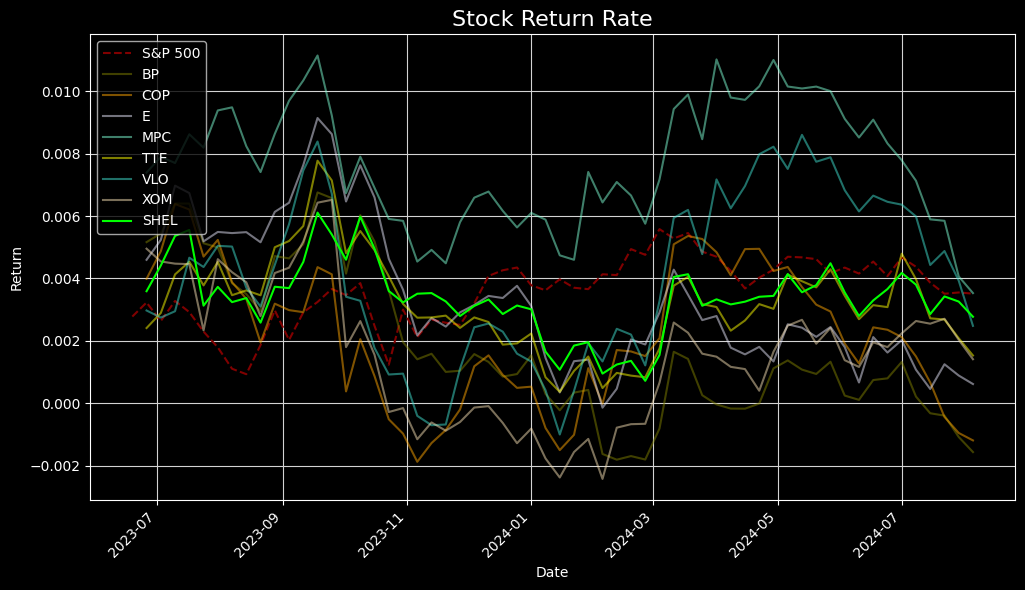

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("dark_background")

fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(12, 6)

Moving = 52

# Plot S&P 500 with dashed line
axes.plot(Index["Date"], Index["S&P 500"].rolling(Moving).mean(), label="S&P 500", color="maroon", linestyle="--")

# Plot other stocks
for i, stock in enumerate(Stock_all.iloc[:, 1:].columns):
    if stock not in tickers_highlight:
        color = lighter_colors[i % len(darker_colors)]  # Use modulo to avoid IndexError
        axes.plot(Stock_all["Date"], Stock_all[stock].rolling(Moving).mean(), label=stock, color=color,  alpha=0.5) #linestyle=":")

# Plot highlighted stocks
for i, stock in enumerate(Stock_all.iloc[:, 1:].columns):
    if stock in tickers_highlight:
        color = lighter_colors[i % len(darker_colors)]  # Use modulo to avoid IndexError
        axes.plot(Stock_all["Date"], Stock_all[stock].rolling(Moving).mean(), label=stock, color=color)

axes.set(title="Stock Return Rate", xlabel="Date", ylabel="Return")
axes.title.set_size(16)
plt.grid(color="lightgray")
fig.autofmt_xdate(rotation=45)  # format x-axis as date, rotate 45 degrees
fig.tight_layout()  # use tight layout
axes.legend(loc="upper left")  # move legend to upper left
fig.subplots_adjust(right=0.85)  # adjust subplots to make legend fit
axes.grid(color="lightgray")
plt.show()

Plots the investment growth for each stock over time, with the initial investment being $1000. It includes the S&P 500 index and highlights the stocks listed in tickers_highlight, while other stocks are plotted with a dotted line.

In [ ]:
Stock_all_Investment = Stock_all.copy()
Stock_all_Investment.iloc[:, 1:] = Stock_all_Investment.iloc[:, 1:].apply(lambda x: (1+x).cumprod()*1000)

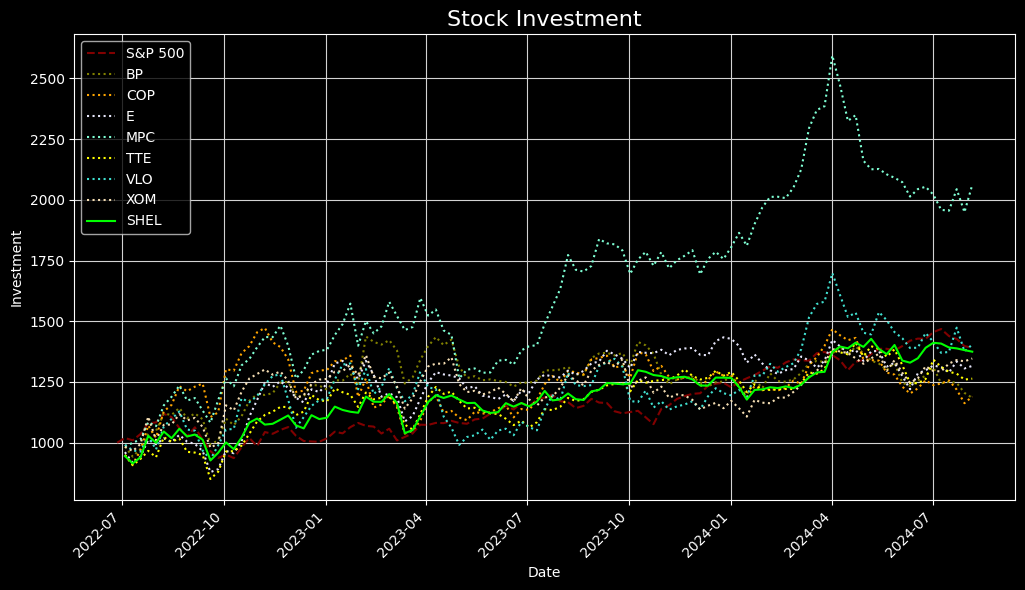

In [ ]:
import matplotlib.pyplot as plt

plt.style.use("dark_background")

# Chart of cost of equity for each year for Amazon stock graphically represented from 2002 to 2022
fig, axes = plt.subplots(nrows=1, ncols=1)
fig.set_size_inches(12, 6)

# Change to other Index if Needed
axes.plot(Index_Investment["Date"], Index_Investment["S&P 500"], label="S&P 500", color="maroon", linestyle="--")

# Plot other stocks
for i, stock in enumerate(Stock_all_Investment.iloc[:, 1:].columns):
    if stock not in tickers_highlight:
        color = lighter_colors[i % len(darker_colors)]  # Use modulo to avoid IndexError
        axes.plot(Stock_all_Investment["Date"], Stock_all_Investment[stock], label=stock, color=color, linestyle=":")

# Plot highlighted stocks
for i, stock in enumerate(Stock_all_Investment.iloc[:, 1:].columns):
    if stock in tickers_highlight:
        color = lighter_colors[i % len(darker_colors)]  # Use modulo to avoid IndexError
        axes.plot(Stock_all_Investment["Date"], Stock_all_Investment[stock], label=stock, color=color)

axes.set(title="Stock Investment", xlabel="Date", ylabel="Investment")
axes.title.set_size(16)
plt.grid(color="lightgray")
fig.autofmt_xdate(rotation=45)  # format x-axis as date, rotate 45 degrees

# Set face color of the axes
# axes.set_facecolor('black')  # Uncomment if you want to change the background behind the grid

fig.tight_layout()  # Use tight layout
axes.legend(loc=2)  # Move legend to upper left
fig.subplots_adjust(right=0.85)  # Adjust subplots to make legend fit
axes.grid(color="lightgray")
plt.show()
